In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\ML\csv\insurance.csv")

In [3]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<AxesSubplot:>

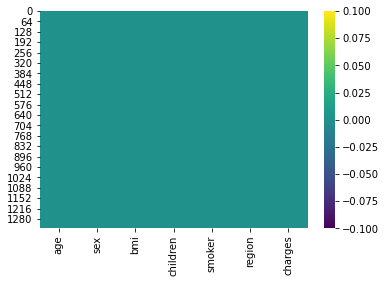

In [4]:
sns.heatmap(df.isnull(), cbar = True , cmap = 'viridis')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
sex = pd.get_dummies(df['sex'], drop_first= True)
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [7]:
smoker = pd.get_dummies(df['smoker'], drop_first= True)
smoker.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [8]:
region = pd.get_dummies(df['region'], drop_first=True)
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
df = pd.concat([df, sex, smoker, region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [10]:
df.drop(['sex', 'smoker', 'region'], axis = 1, inplace = True)
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


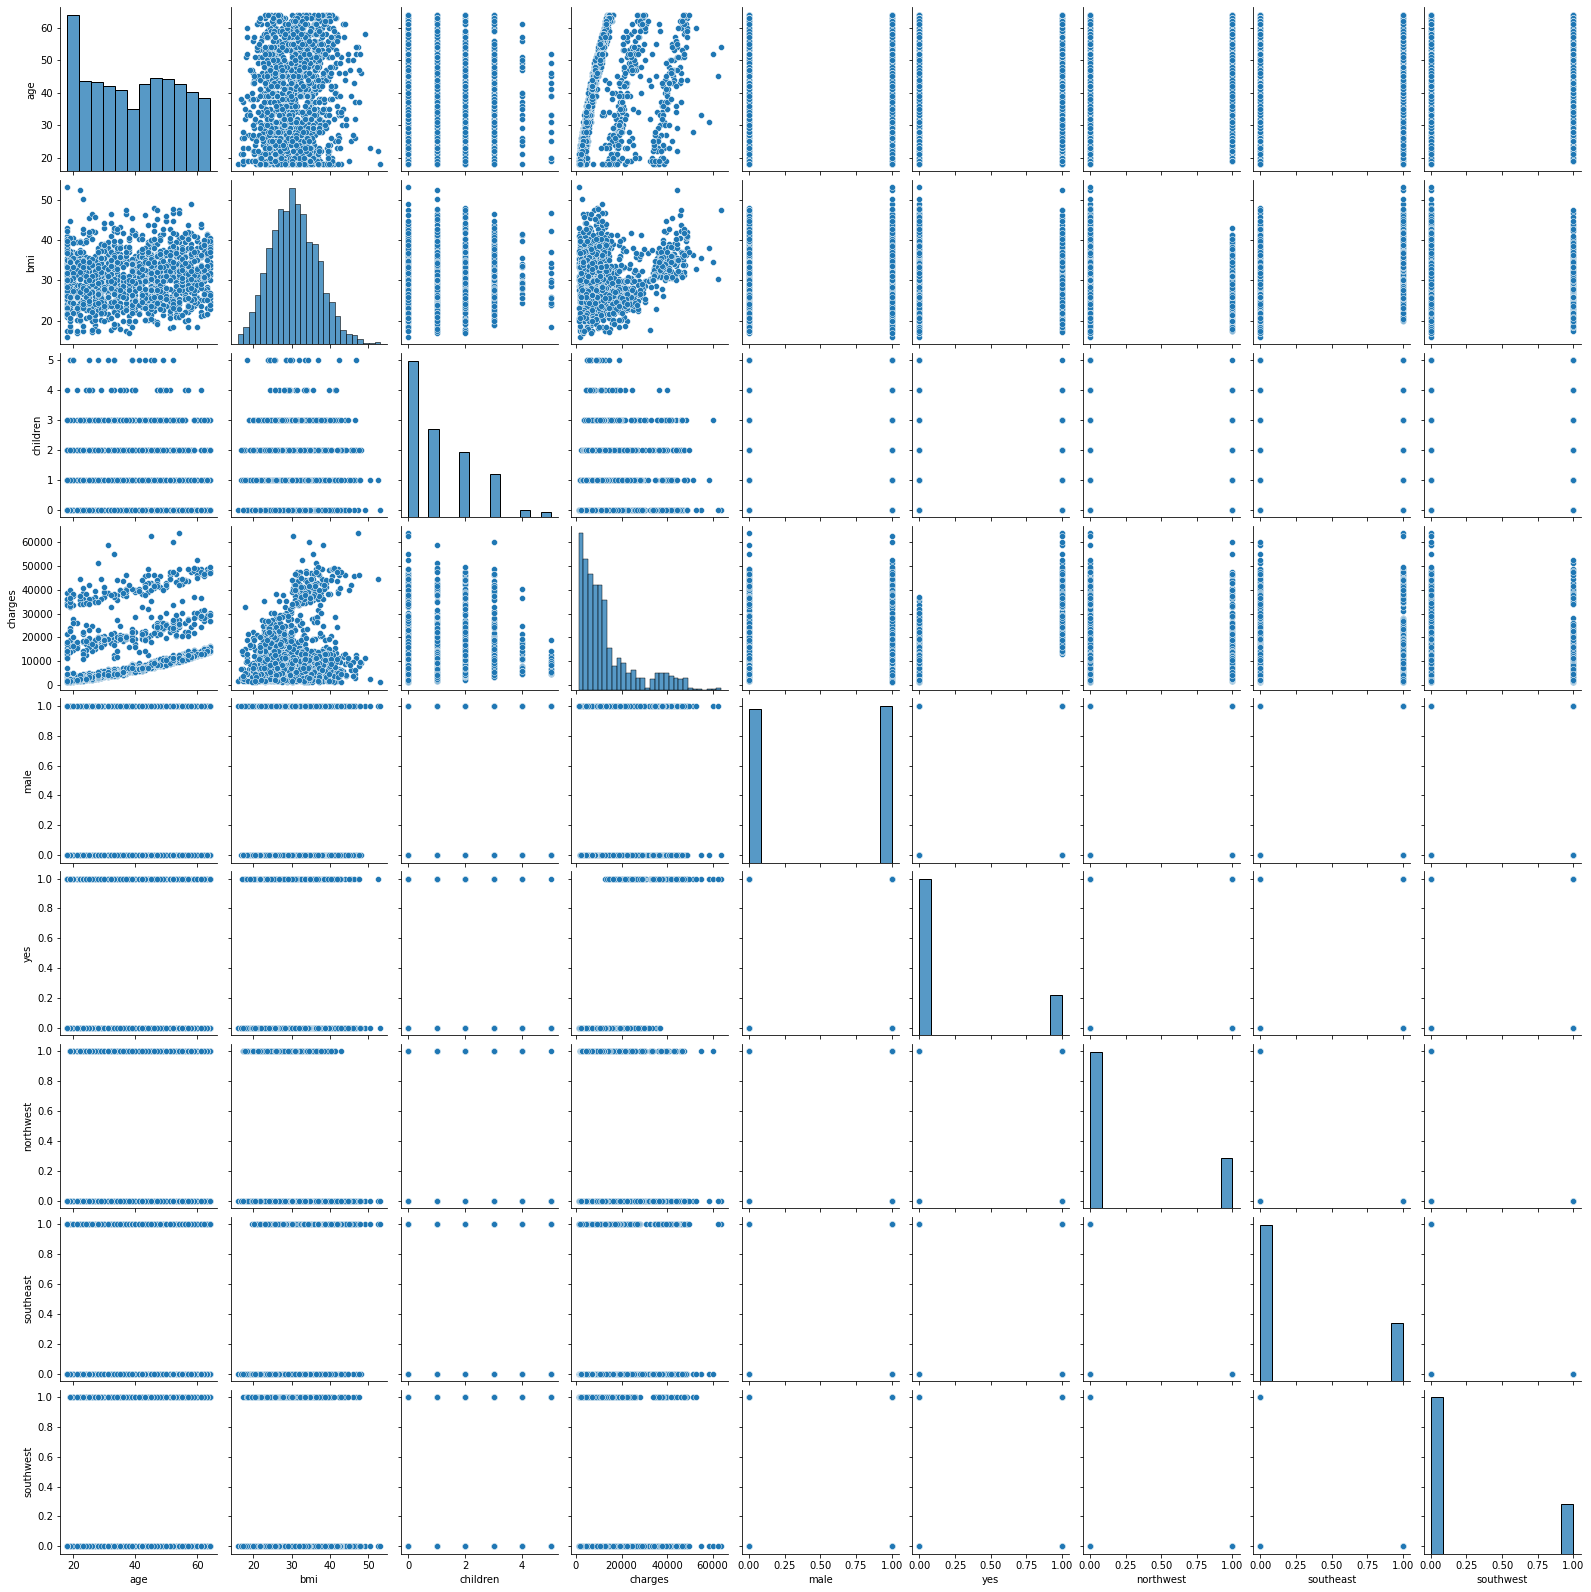

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<AxesSubplot:>

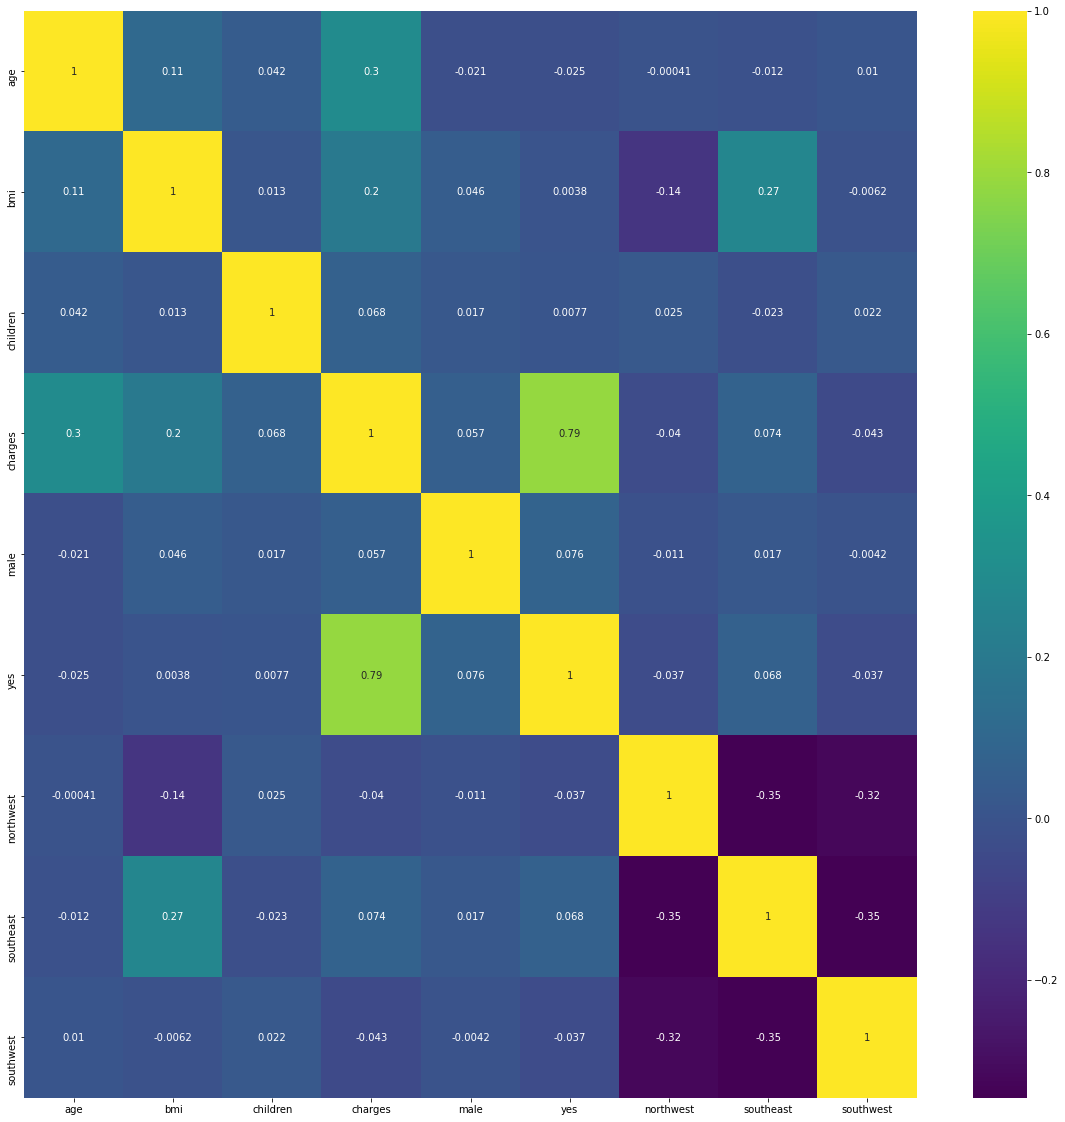

In [13]:
corr_relation = df.corr()
top_corr_feature = corr_relation.index
plt.figure(figsize = (20, 20))
sns.heatmap(df[top_corr_feature].corr(), annot = True, cmap = 'viridis')

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
model = ExtraTreesRegressor()

In [16]:
X = df.iloc[:, [0, 1, 5]]
y = df.iloc[:, [3]]

In [17]:
model.fit(X,y)

<ipython-input-17-4c1a2828403e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.12245996 0.25469226 0.62284779]


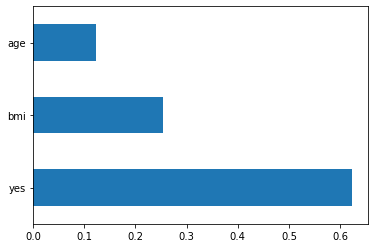

In [19]:
features = pd.Series(model.feature_importances_, index = X.columns)
features.nlargest(3).plot(kind = 'barh')
plt.show()

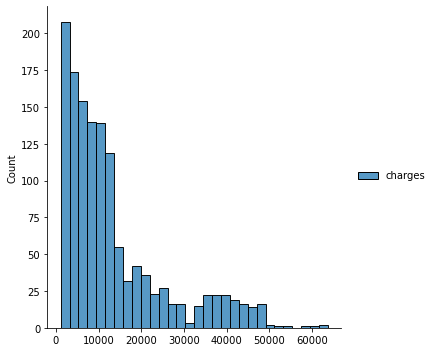

In [20]:
sns.displot(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
print(regression.score(X_train, y_train))

0.7277881381968745


In [24]:
print(regression.score(X_test, y_test))

0.7872914737498631


In [25]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regression, X, y, cv = 10)

In [26]:
score.mean()

0.7432289194657907

In [27]:
regression.coef_

array([[  260.31215553,   321.78437125, 23435.03624238]])

In [28]:
regression.intercept_

array([-11694.64763293])

In [29]:
prediction = regression.predict(X_test)

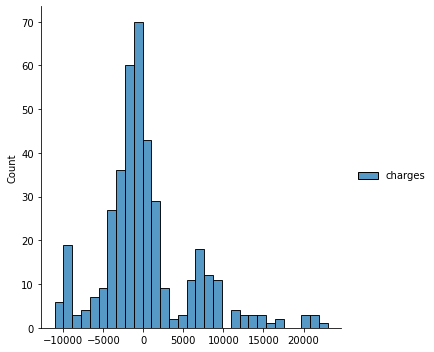

In [30]:
sns.displot(y_test-prediction)

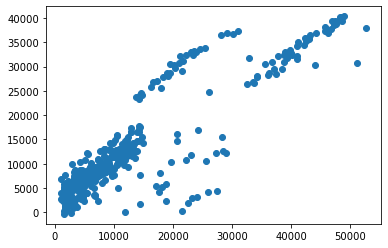

In [31]:
plt.scatter(y_test, prediction)

In [32]:
import pickle
file = open('regression_model.pkl', 'wb')
pickle.dump(regression, file)

# Compare Linear, Ridge & Lasso Regression 

# Linear Regression

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [34]:
lin_regression = LinearRegression()
mse = cross_val_score(lin_regression, X, y, scoring='neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37196632.614724636


# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [36]:
ridge = Ridge()
parameter = {'alpha':[1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 3, 5, 10, 20, 30, 40]}
ridge_regression = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv = 5)
ridge_regression.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 3, 5, 10,
                                   20, 30, 40]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 0.1}
-37196500.70714105


# Lasso Regression

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [39]:
lasso = Lasso()
parameter = {'alpha':[1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 3, 5, 10, 20, 30, 40]}
lasso_regression = GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv = 5)
lasso_regression.fit(X, y)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19803944156.36945, tolerance: 15438621.642778208
  model = cd_fast.enet_coordinate_descent(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19716859244.087055, tolerance: 16124878.331579175
  model = cd_fast.enet_coordinate_descent(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20292491326.971004, tolerance: 15669097.737329187
  model = cd_fast.enet_coordinate_descent(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 1, 3, 5, 10,
                                   20, 30, 40]},
             scoring='neg_mean_squared_error')

In [40]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 5}
-37196534.45061399


# Model Evaluation

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

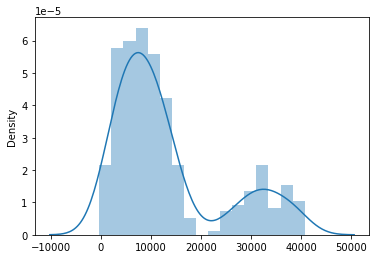

In [41]:
predictions = lasso_regression.predict(X_test)
sns.distplot(predictions)

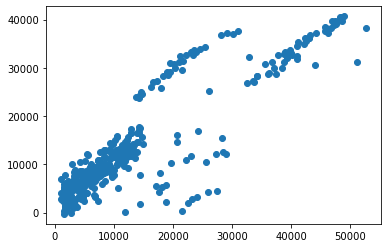

In [42]:
plt.scatter(y_test, predictions)

# Regression Evaluation Metrics

In [43]:
from sklearn import metrics

In [44]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3998.9080252188423
MSE 33741018.908052094
RMSE 5808.701998558034


In [45]:
import pickle
files = open('lasso_regression.pkl', 'wb')
pickle.dump(lasso_regression, files)